In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plot_likert
import typing
import pingouin as pg

Colors = typing.List[str]

TRANSPARENT = "#ffffff00"

In [2]:
# load the data from the post_question_df.csv file
df = pd.read_csv('processed_data/post_question_df.csv')
df_no_id = df.drop(columns=['participant_id', 'info_usage', 'other_info'])
# drop any rows with NaN values
df = df.dropna()
df_no_id = df_no_id.dropna()

# for every value in df_no_id, if it is a float, make it an int
for column in df_no_id.columns:
    try:
        df_no_id[column] = df_no_id[column].apply(lambda x: str(int(x)) if isinstance(x, float) else x)
    except:
        pass
# print(df.head())
print(df_no_id.head())
print(len(df_no_id))

  tsr_useful fc_useful rel_tsr_useful rel_fc_useful
0          2         2              4             3
1          4         4              5             5
3          4         2              4             2
4          3         3              5             4
5          5         4              3             2
90


In [3]:
# print the mean of each tsr_useful, fc_useful, rel_tsr_useful, rel_fc_useful
print(df['tsr_useful'].mean())
print(df['fc_useful'].mean())
print(df['rel_tsr_useful'].mean())
print(df['rel_fc_useful'].mean())


# get percentage of each likert response for 1-5 for tsr_useful, fc_useful, rel_tsr_useful, rel_fc_useful
tsr_useful_counts = df['tsr_useful'].value_counts(normalize=True) * 100
fc_useful_counts = df['fc_useful'].value_counts(normalize=True) * 100
rel_tsr_useful_counts = df['rel_tsr_useful'].value_counts(normalize=True) * 100
rel_fc_useful_counts = df['rel_fc_useful'].value_counts(normalize=True) * 100
# if a counts doesnt have 1.0 in it, add it with 0
for i in range(1, 6):
    if i not in tsr_useful_counts:
        tsr_useful_counts[i] = 0
    if i not in fc_useful_counts:
        fc_useful_counts[i] = 0
    if i not in rel_tsr_useful_counts:
        rel_tsr_useful_counts[i] = 0
    if i not in rel_fc_useful_counts:
        rel_fc_useful_counts[i] = 0
        

4.056818181818182
3.6931818181818183
4.125
3.840909090909091


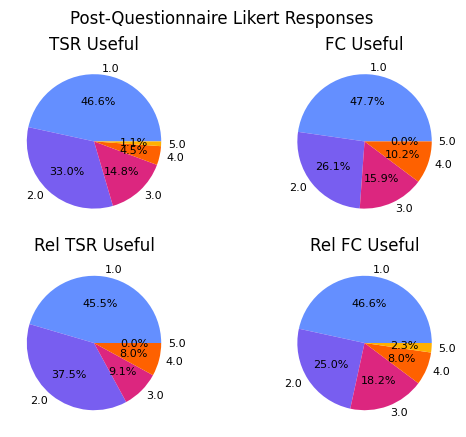

In [4]:
# use seaborn to make pie charts of the counts
# make 1.0 dark red, 2.0 red, 3.0 yellow, 4.0 light green, 5.0 dark green
# make numbers large font
colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
ibm_colors: Colors = [
    TRANSPARENT,
    "#648FFF",
    "#785EF0",
    "#DC267F",
    "#FE6100",
    "#FFB000",
]
# swap the order of the colors besides the first one
ibm_colors[1:] = ibm_colors[1:][::-1]

labels = ['1.0', '2.0', '3.0', '4.0', '5.0']
# plt.pie(tsr_useful_counts, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 12})
# plt.show()
# plot all four pie charts on a 2x2 grid
fig, axs = plt.subplots(2, 2)
fig.suptitle('Post-Questionnaire Likert Responses')
axs[0, 0].pie(tsr_useful_counts, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[0, 0].set_title('TSR Useful')
axs[0, 1].pie(fc_useful_counts, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[0, 1].set_title('FC Useful')
axs[1, 0].pie(rel_tsr_useful_counts, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[1, 0].set_title('Rel TSR Useful')
axs[1, 1].pie(rel_fc_useful_counts, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[1, 1].set_title('Rel FC Useful')
plt.show()

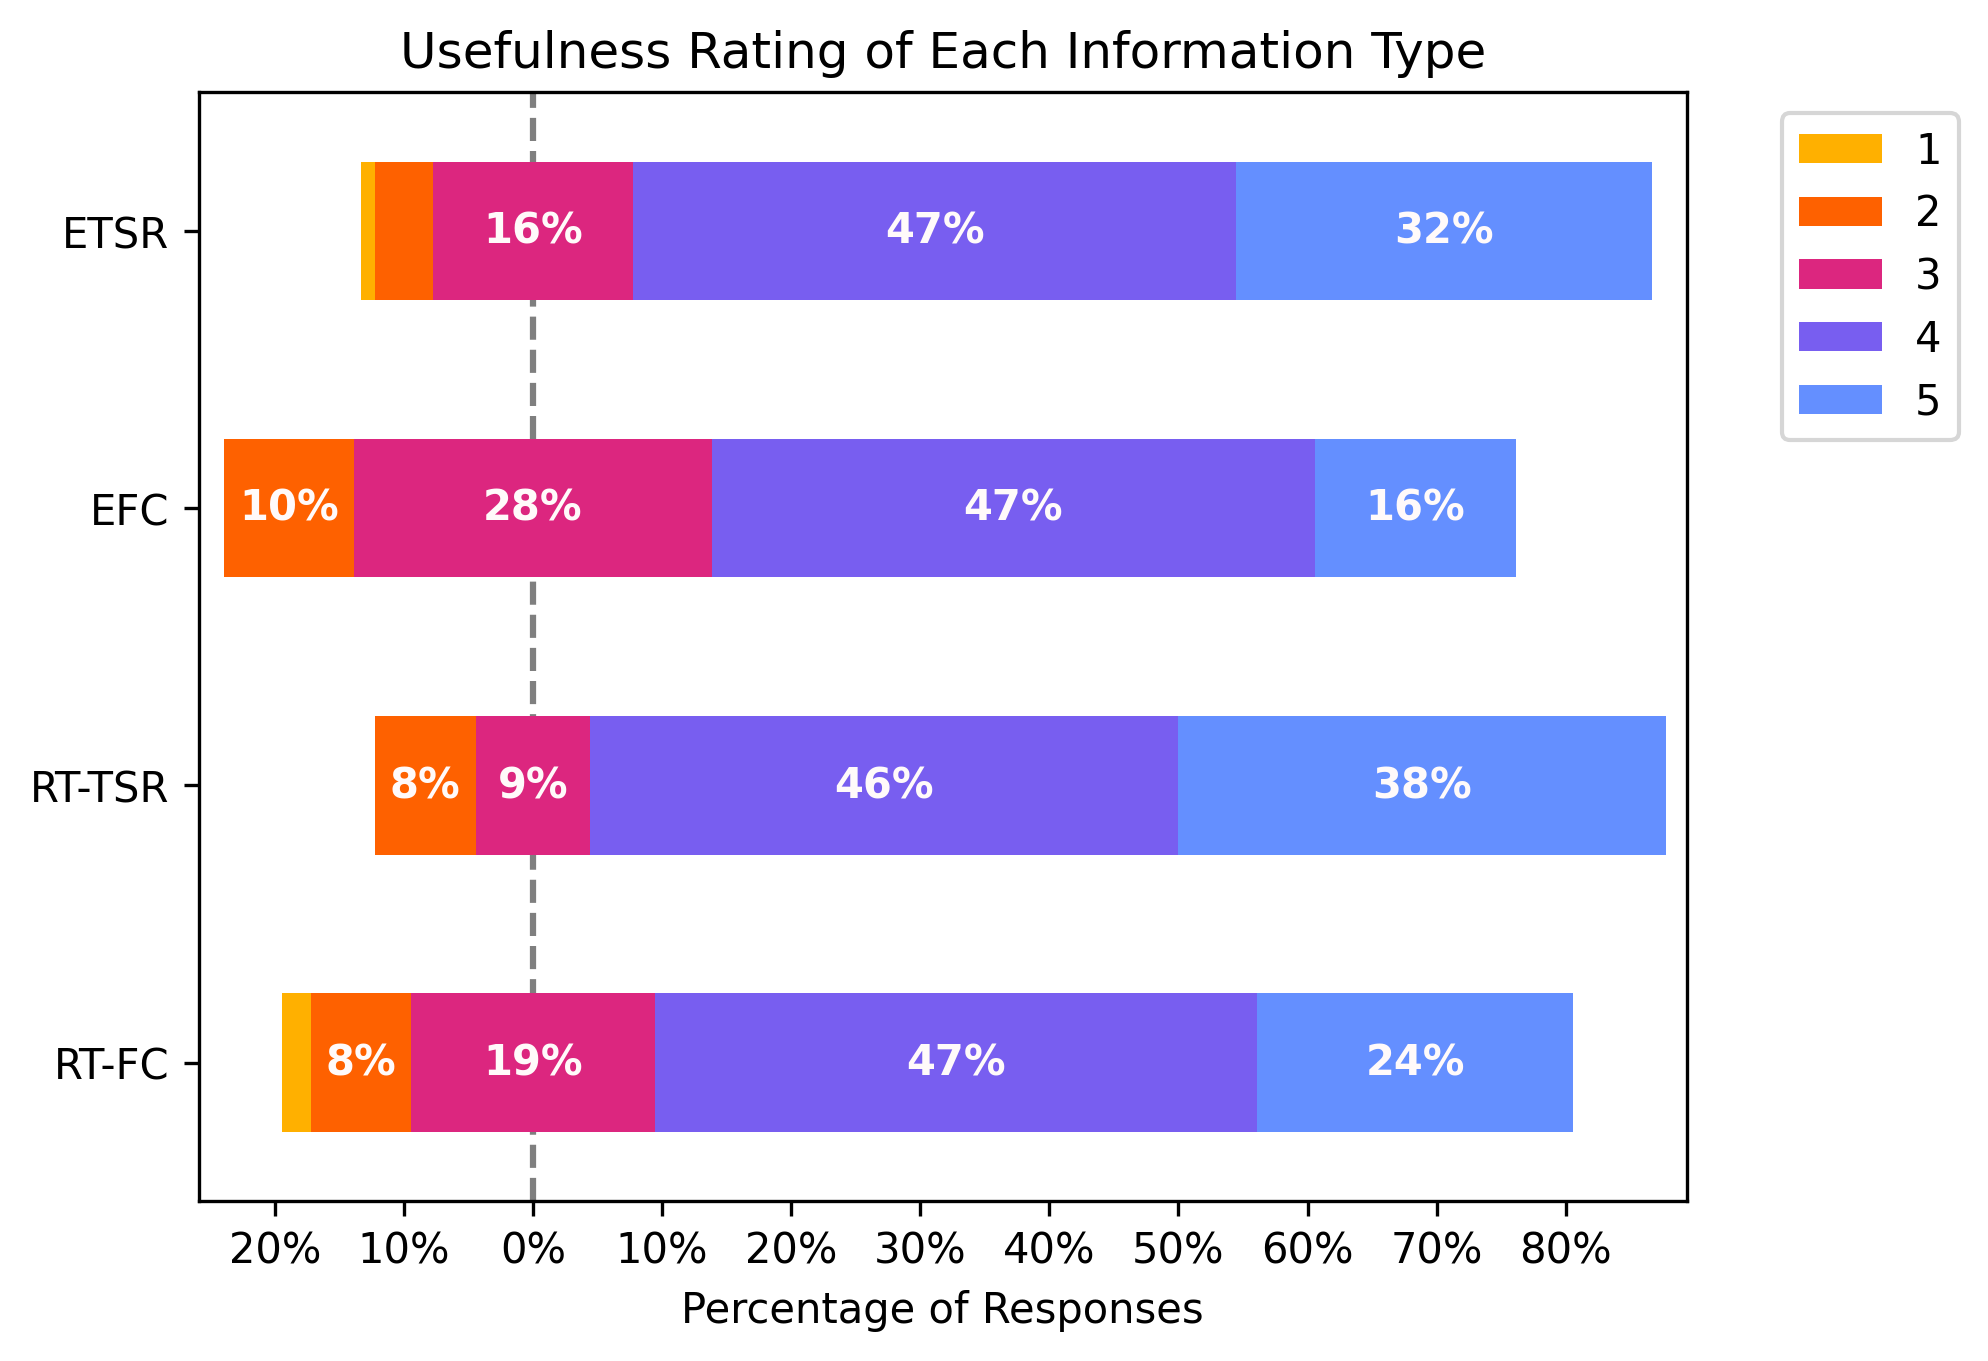

In [5]:
# plot the data using plot_likert.plot_likert(data, plot_likert.scales.agree, plot_percentage=True,
#                   # bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral);
# data is df_no_id
# change headings of df_no_id 
# tsr_useful -> ETSR
# fc_useful -> EFC
# rel_tsr_useful -> RT-TSR
# rel_fc_useful -> RT-FC
df_no_id = df_no_id.rename(columns={'tsr_useful': 'ETSR', 'fc_useful': 'EFC', 'rel_tsr_useful': 'RT-TSR', 'rel_fc_useful': 'RT-FC'})

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.0f"
# plot_likert.plot_likert(df_no_id, plot_likert.scales.raw5, plot_percentage=True,
#                         bar_labels=True, bar_labels_color="snow", colors=ibm_colors, dpi=300)

fig, ax = plt.subplots(dpi=300)
plot_likert.plot_likert(df_no_id, plot_likert.scales.raw5, plot_percentage=True,
                        bar_labels=True, bar_labels_color="snow", colors=ibm_colors, ax=ax)
plt.title('Usefulness Rating of Each Information Type')
# save the plot as a png
plt.savefig('plots/post_likert/usefulness_likert_study1.png', bbox_inches='tight')
plt.show()

In [27]:
# use pingouin to do t-tests for each pair of columns
# tsr_useful vs fc_useful
tsr_fc = pg.ttest(df['tsr_useful'], df['fc_useful'])
print(f'tsr_fc: p-value {tsr_fc["p-val"][0]}, bf10 {tsr_fc["BF10"][0]}')
# tsr_useful vs rel_tsr_useful
tsr_rel_tsr = pg.ttest(df['tsr_useful'], df['rel_tsr_useful'])
print(f'tsr_rel_tsr: {tsr_rel_tsr["p-val"][0]}, bf10 {tsr_rel_tsr["BF10"][0]}')
# tsr_useful vs rel_fc_useful
tsr_rel_fc = pg.ttest(df['tsr_useful'], df['rel_fc_useful'])
print(f'tsr_rel_fc: {tsr_rel_fc["p-val"][0]}, bf10 {tsr_rel_fc["BF10"][0]}')
# fc_useful vs rel_tsr_useful
fc_rel_tsr = pg.ttest(df['fc_useful'], df['rel_tsr_useful'])
print(f'fc_rel_tsr: {fc_rel_tsr["p-val"][0]}, bf10 {fc_rel_tsr["BF10"][0]}')
# fc_useful vs rel_fc_useful
fc_rel_fc = pg.ttest(df['fc_useful'], df['rel_fc_useful'])
print(f'fc_rel_fc: {fc_rel_fc["p-val"][0]}, bf10 {fc_rel_fc["BF10"][0]}')
# rel_tsr_useful vs rel_fc_useful
rel_tsr_rel_fc = pg.ttest(df['rel_tsr_useful'], df['rel_fc_useful'])
print(f'rel_tsr_rel_fc: {rel_tsr_rel_fc["p-val"][0]}, bf10 {rel_tsr_rel_fc["BF10"][0]}')



tsr_fc: p-value 0.006117334527039793, bf10 5.563
tsr_rel_tsr: 0.6074065623636253, bf10 0.185
tsr_rel_fc: 0.12287829909478468, bf10 0.497
fc_rel_tsr: 0.0012357123008060358, bf10 22.167
fc_rel_fc: 0.2870127992708405, bf10 0.277
rel_tsr_rel_fc: 0.04350091088633591, bf10 1.101


In [7]:
# now load data from the public space study
pb_df = pd.read_csv('public_space_data/survey_data.csv')
print(pb_df.head())

   participant_id  tsr  fc  rel_tsr  rel_fc  \
0               1    4   3        4       5   
1               2    5   4        4       4   
2               3    4   5        4       5   
3               4    5   5        4       4   
4               5    5   5        4       4   

                                          other_info  \
0                                                NaN   
1                                                NaN   
2  Likelihood of failure/issue unrelated to perfo...   
3  Robot safety when performing the task. In the ...   
4  Does size or weight of the can make a differen...   

                                      robot_decision  
0                                                NaN  
1                                                NaN  
2  compare estimated/real failure rate with human...  
3  Cost is a big factor. Is it cheaper to hire a ...  
4  -whether a failure damaged the integrity of th...  


In [8]:
# drip the participant_id, other_info, and robot_decision columns
pb_df = pb_df.drop(columns=['participant_id', 'other_info', 'robot_decision'])
# drop any rows with NaN values
pb_df = pb_df.dropna()
print(pb_df.head())
print(len(pb_df))

   tsr  fc  rel_tsr  rel_fc
0    4   3        4       5
1    5   4        4       4
2    4   5        4       5
3    5   5        4       4
4    5   5        4       4
14


In [9]:
# change all the values in pb_df to strings
for column in pb_df.columns:
    try:
        pb_df[column] = pb_df[column].apply(lambda x: str(int(x)))
    except:
        pass

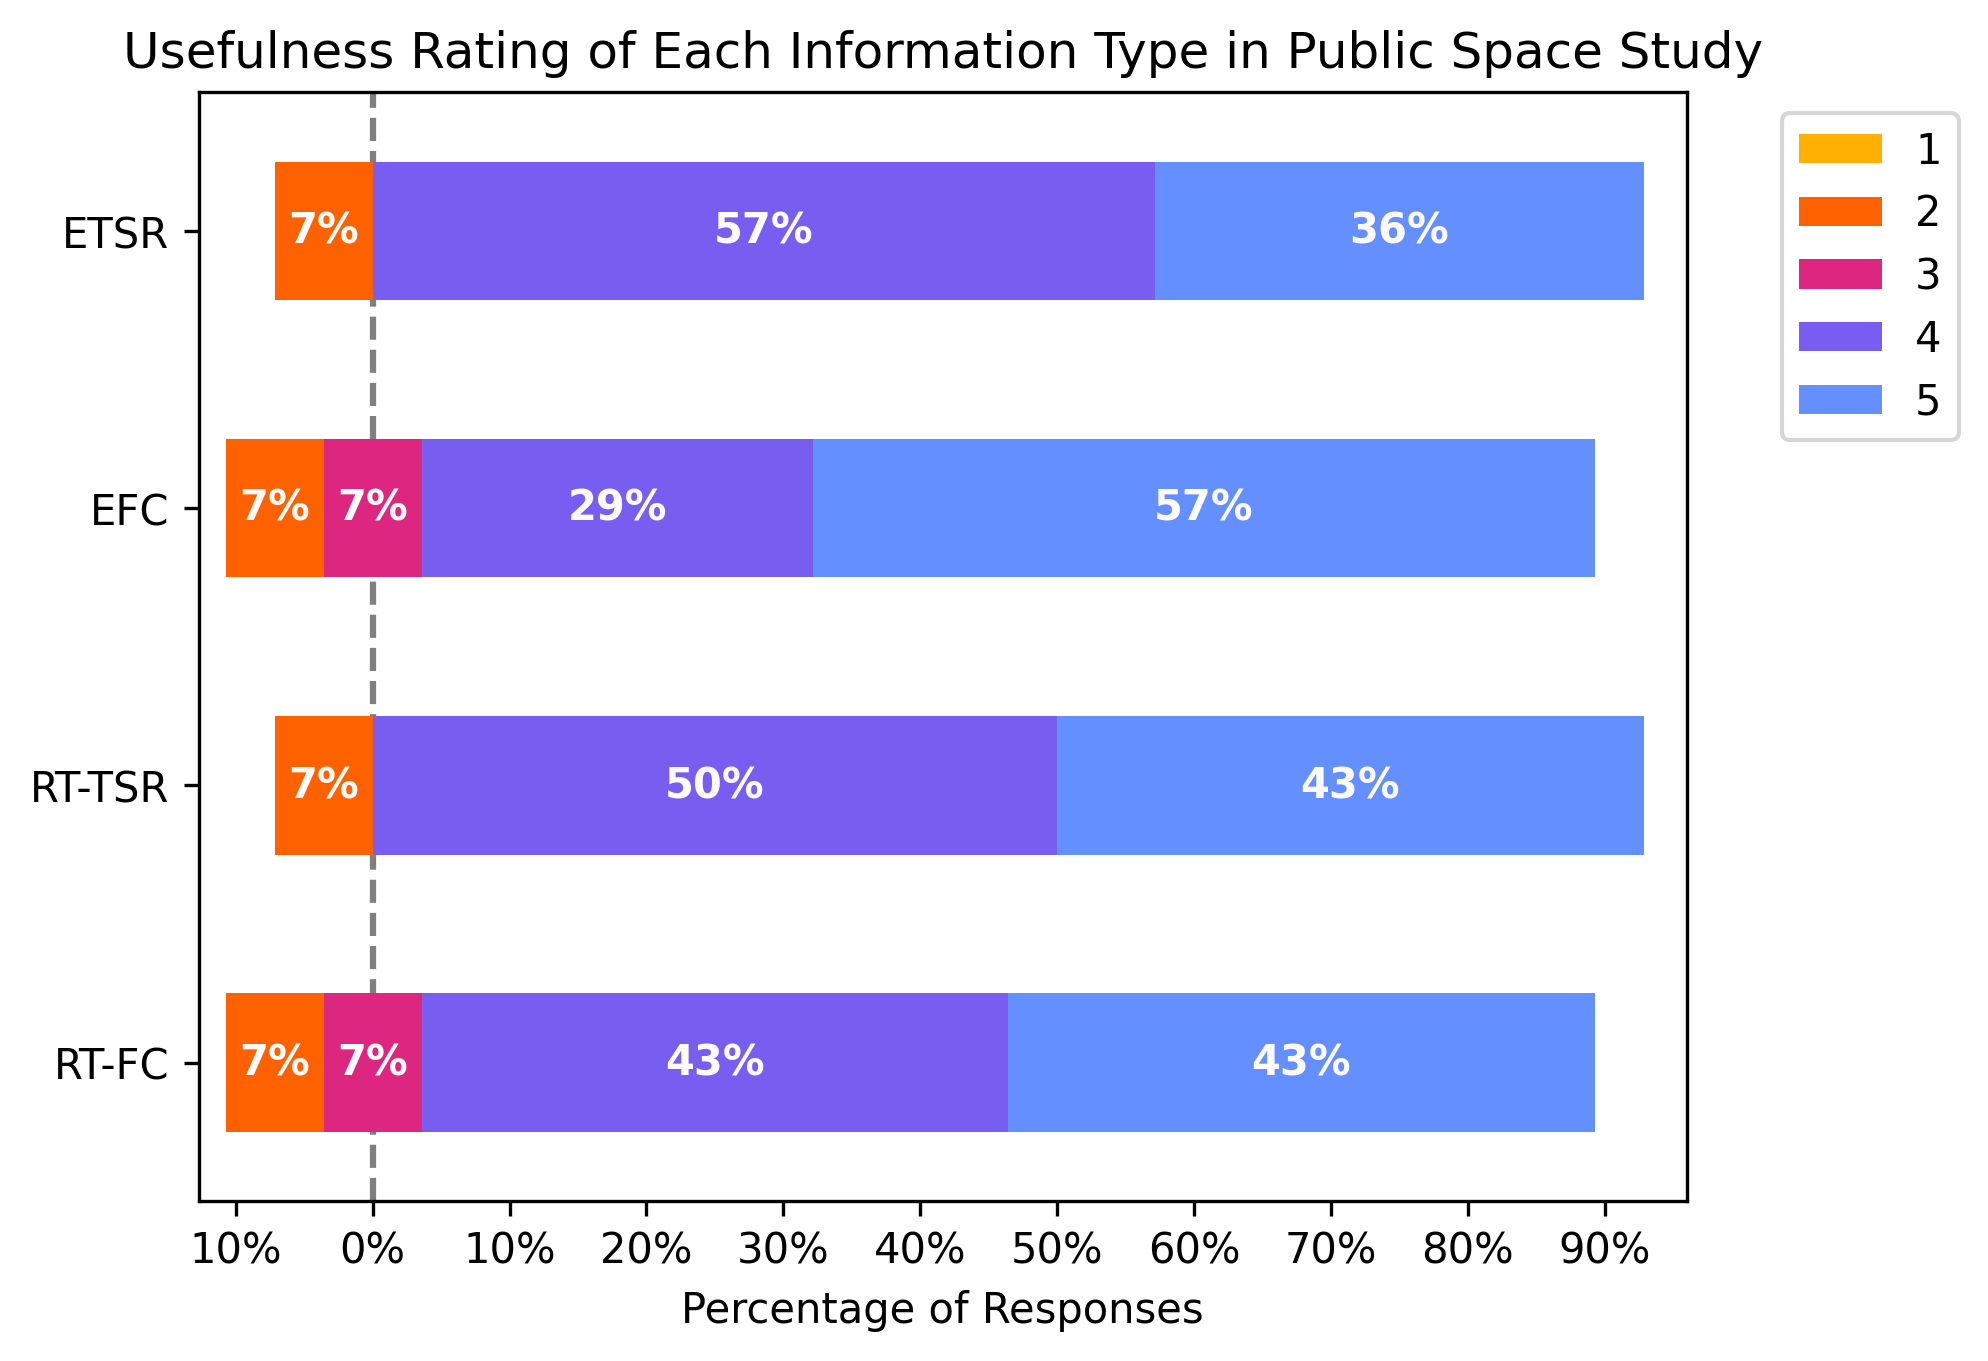

In [13]:
# make likert plot
# first change the column names
# tsr -> ETSR
# fc -> EFC
# rel_tsr -> RT-TSR
# rel_fc -> RT-FC
pb_df = pb_df.rename(columns={'tsr': 'ETSR', 'fc': 'EFC', 'rel_tsr': 'RT-TSR', 'rel_fc': 'RT-FC'})

# plot_likert.plot_likert(pb_df, plot_likert.scales.raw5, plot_percentage=True,
#                         bar_labels=True, bar_labels_color="snow", colors=ibm_colors)
fig, ax = plt.subplots(dpi=300)
plot_likert.plot_likert(pb_df, plot_likert.scales.raw5, plot_percentage=True,
                        bar_labels=True, bar_labels_color="snow", colors=ibm_colors, ax=ax)
plt.title('Usefulness Rating of Each Information Type in Public Space Study')
# save the plot as a png
plt.savefig('plots/post_likert/usefulness_likert_public_space.png', bbox_inches='tight')